<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0703/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
# ((nparray:x_train, nparray:y_train), (nparray:x_test, nparray:y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [3]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

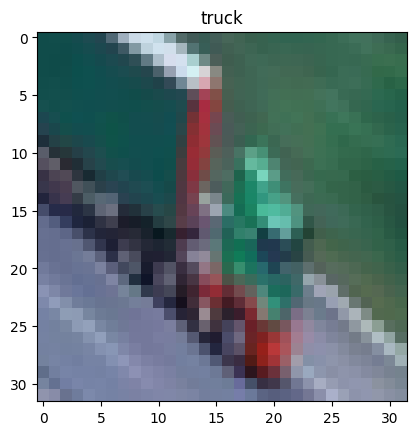

In [4]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
idx = 50
plt.title("{}".format(trans[y_train[idx]]))
plt.imshow(x_train[idx])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
l = [
    # 1f(3 * 3 * 3) * 64 + 64 = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1f(3 * 3 * 64) * 128 + 128 = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256)        0

In [7]:
from tensorflow.keras.layers import GlobalAveragePooling2D
l = [
    # 1f(3 * 3 * 3) * 64 + 64 = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1f(3 * 3 * 64) * 128 + 128 = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 256)       

In [8]:
# Sparse: 你不用自己做one-hot encoding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [9]:
# X: scaling, 隨機係數是有在跟你的輸入作配合的
# 0~1 / -1~1
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [10]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
# batch_size = 20(圖片大或資料少)~200(圖片小或資料多)
# 54000 / 200 = 270(梯度下降)
# 沒做任何事: 差不多100個epch訓練完畢
# relu: 35epoch
# ce: 15epoch
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=100,
     validation_split=0.1,
     callbacks=c)

Epoch 1/100
225/225 [==============================] - 17s 20ms/step - loss: 1.6599 - accuracy: 0.3882 - val_loss: 1.3766 - val_accuracy: 0.4956
Epoch 2/100
225/225 [==============================] - 5s 20ms/step - loss: 1.2337 - accuracy: 0.5579 - val_loss: 1.0554 - val_accuracy: 0.6210
Epoch 3/100
225/225 [==============================] - 4s 20ms/step - loss: 1.0101 - accuracy: 0.6412 - val_loss: 0.9358 - val_accuracy: 0.6690
Epoch 4/100
225/225 [==============================] - 4s 20ms/step - loss: 0.8661 - accuracy: 0.6971 - val_loss: 0.8626 - val_accuracy: 0.7022
Epoch 5/100
225/225 [==============================] - 4s 19ms/step - loss: 0.7680 - accuracy: 0.7331 - val_loss: 0.7618 - val_accuracy: 0.7390
Epoch 6/100
225/225 [==============================] - 4s 20ms/step - loss: 0.6731 - accuracy: 0.7666 - val_loss: 0.7799 - val_accuracy: 0.7324
Epoch 7/100
225/225 [==============================] - 4s 19ms/step - loss: 0.6070 - accuracy: 0.7906 - val_loss: 0.7416 - val_accuracy

In [12]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.6989 - accuracy: 0.7598


[0.6989428997039795, 0.7598000168800354]

In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=["{}(pre)".format(trans[i]) for i in range(10)],
      index=["{}(true)".format(trans[i]) for i in range(10)])

313/313 [==============================] - 1s 3ms/step


,airplane(pre),automobile(pre),bird(pre),cat(pre),deer(pre),dog(pre),frog(pre),horse(pre),ship(pre),truck(pre)
airplane(true),821,10,34,22,9,8,5,7,68,16
automobile(true),28,836,10,9,1,2,7,1,38,68
bird(true),54,1,707,57,47,64,24,22,19,5
cat(true),19,2,82,629,38,154,26,21,17,12
deer(true),19,2,103,64,652,52,24,68,15,1
dog(true),10,1,36,164,29,698,7,33,13,9
frog(true),3,3,89,84,26,29,744,2,14,6
horse(true),15,2,44,43,36,63,6,779,4,8
ship(true),48,9,10,15,1,4,1,1,899,12
truck(true),41,50,7,16,1,7,4,9,32,833


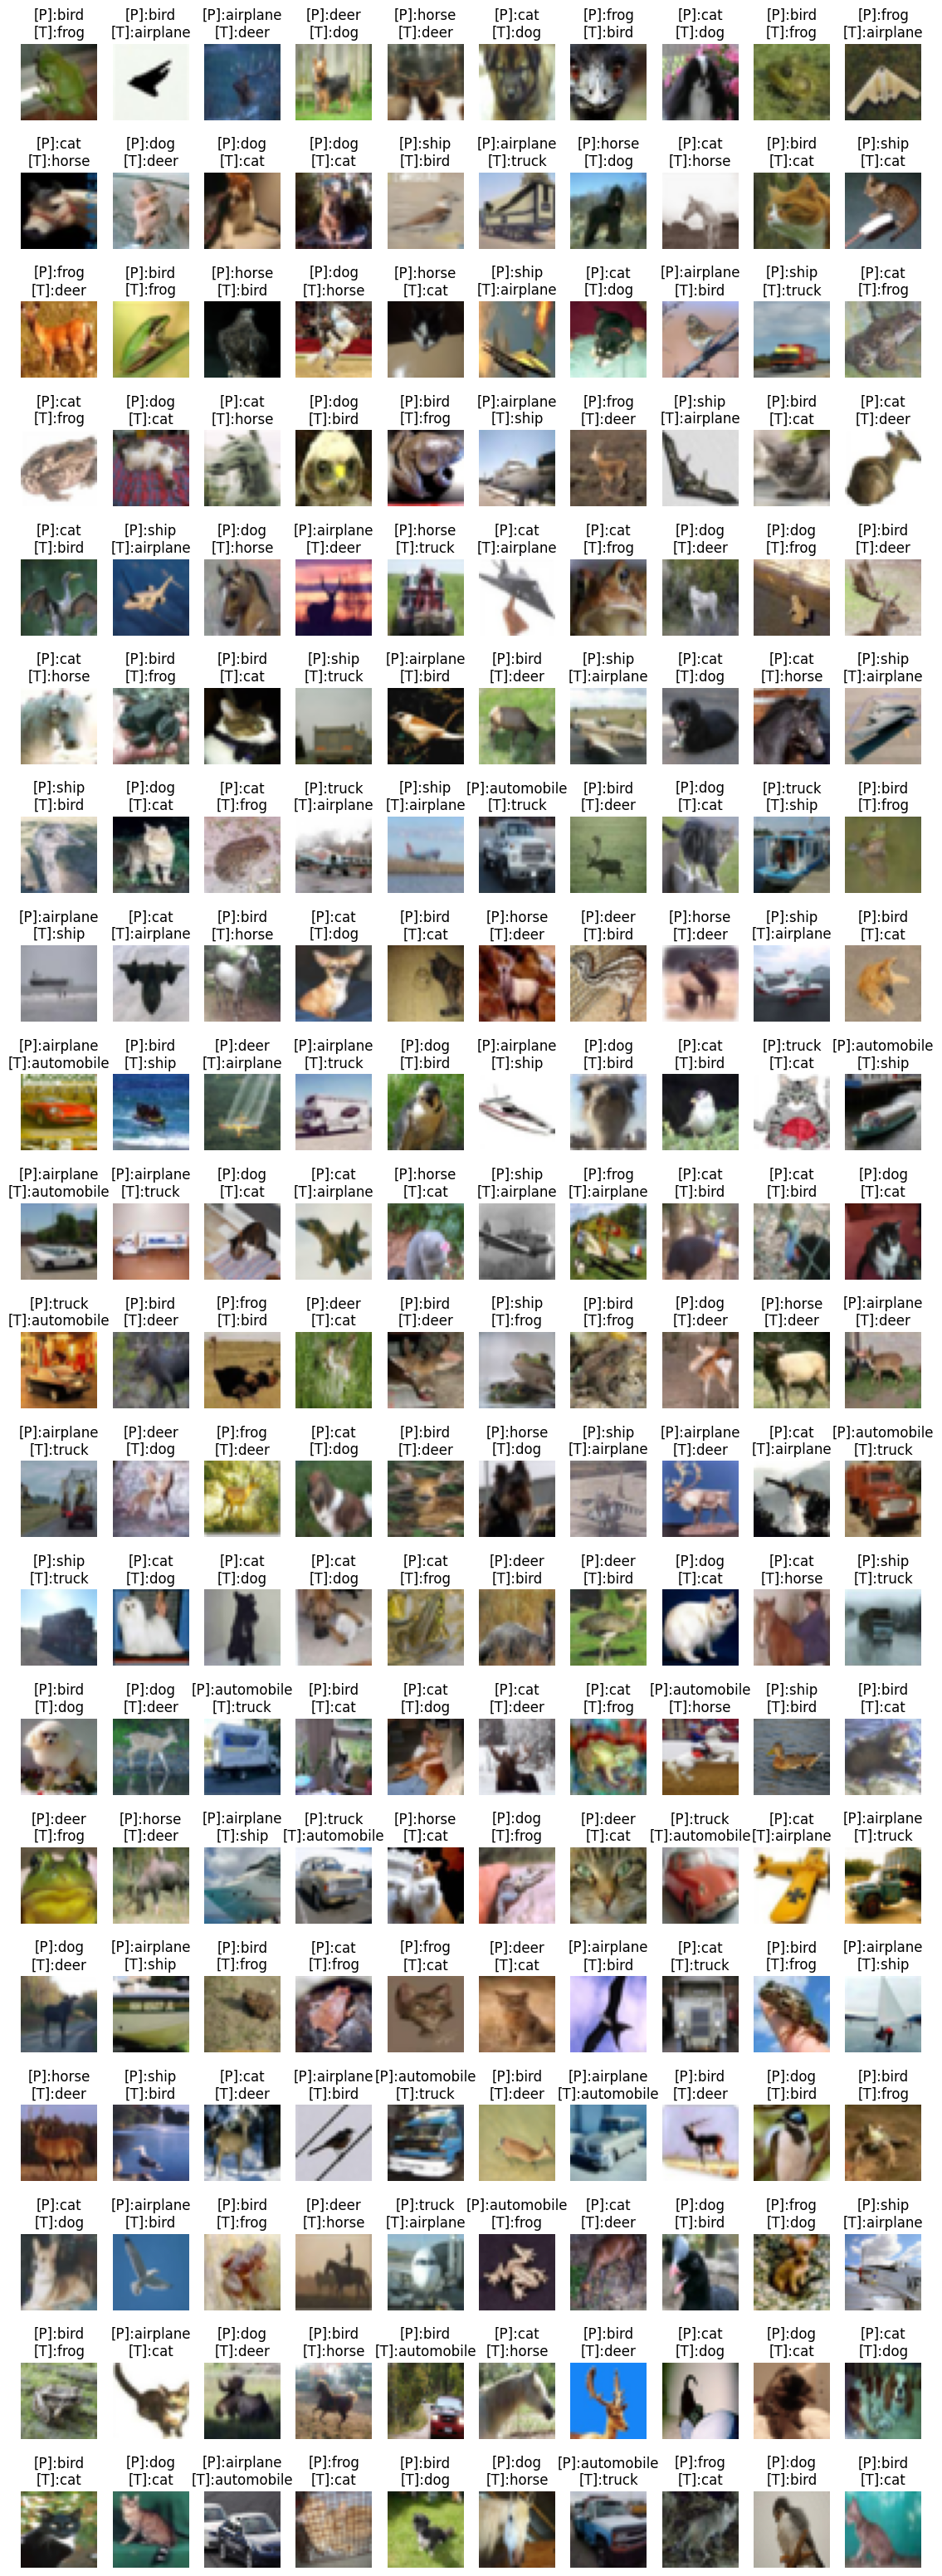

In [16]:
import numpy as np
idx = np.nonzero(pre != y_test)[0][:200]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    # 總高/總寬/ith
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[T]:{}".format(trans[false_pre[i]], trans[false_true[i]])
    plt.title(t)
    plt.imshow(false_img[i])
    plt.axis("off")

1/1 [==============================] - 0s 33ms/step
airplane 的機率是: 0.0007
automobile 的機率是: 1e-04
bird 的機率是: 0.0004
cat 的機率是: 0.4939
deer 的機率是: 0.0034
dog 的機率是: 0.2616
frog 的機率是: 1e-04
horse 的機率是: 0.2386
ship 的機率是: 0.0006
truck 的機率是: 0.0005


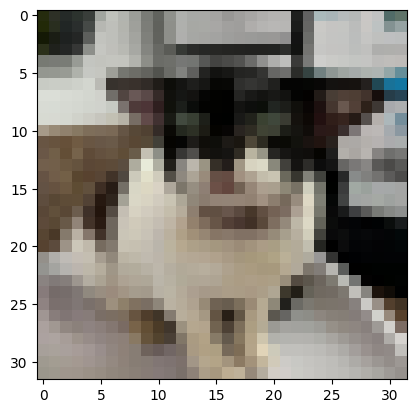

In [27]:
import requests
from PIL import Image
url = "https://5b0988e595225.cdn.sohucs.com/images/20191221/c2ae7941696d4043af4dc825b71f7976.jpeg" # @param {type:"string"}
response = requests.get(url, stream=True)
img = Image.open(response.raw)
img_r = img.resize((32, 32)).convert("RGB")
img_np = np.array(img_r).reshape(1, 32, 32, 3) / 255.0
probs = model.predict(img_np)[0]
for t, p in zip(trans, probs):
    print(t, "的機率是:", round(p, 4))
plt.imshow(img_r)

In [24]:
list(zip([1, 2, 3], [4, 5, 6]))

[(1, 4), (2, 5), (3, 6)]